<a href="https://colab.research.google.com/github/fabianofilho/brain-age-predictor/blob/main/age_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics as m
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EINSTEIN/brain-prediction-rmi/data/volume_and_thickness_octagene.csv',
          na_values='na')

In [ ]:
df.head()

,ID,age,sex,apoe,mmse,3ms,edinburgh,years_education,whole_hippocampus_L,whole_hippocampus_R,...,rh_S_parieto_occipital,rh_S_pericallosal,rh_S_postcentral,rh_S_precentral_inf_part,rh_S_precentral_sup_part,rh_S_suborbital,rh_S_subparietal,rh_S_temporal_inf,rh_S_temporal_sup,rh_S_temporal_transverse
0,C0555,75,F,34.0,29.0,89.0,100.0,1.0,2676.555781,2753.919307,...,2.268,2.082,2.096,2.782,2.373,3.819,2.388,2.826,2.525,2.425
1,C0556,65,F,33.0,29.0,97.0,80.0,7.0,3330.647962,3288.266409,...,2.325,1.660,2.207,2.489,2.461,2.306,2.834,2.645,2.609,2.941
2,C0558,68,F,34.0,29.0,96.0,90.0,2.0,3598.893306,3696.729812,...,2.590,1.719,2.376,2.693,2.776,2.696,2.803,2.246,2.697,2.703
3,C0561,67,F,33.0,29.0,95.0,80.0,2.0,2916.568139,3046.076847,...,2.656,1.710,2.399,2.749,2.697,2.336,2.801,2.628,2.706,2.459
4,C0562,64,F,33.0,30.0,97.0,100.0,4.0,3518.949525,3671.865593,...,2.701,2.103,2.332,2.712,2.473,2.200,2.751,2.726,2.671,2.914


In [ ]:
df['L_hippo_vol_norm']=df['whole_hippocampus_L']/df['whole_brain']
df['R_hippo_vol_norm ']=df['whole_hippocampus_R']/df['whole_brain']

In [ ]:
df.loc[df.sex == 'F', 'sex']=1
df.loc[df.sex == 'M', 'sex']=0

In [ ]:
list_drop = ['ID','edinburgh','3ms','mmse','years_education','whole_hippocampus_L','whole_hippocampus_R','whole_brain','left_hemisphere','right_hemisphere','eTIV']

In [ ]:
dataset = df.drop(list_drop,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
training_set = dataset[dataset.apoe == 33]

In [ ]:
test_set = dataset[(dataset.apoe == 22)|(dataset.apoe == 23)|(dataset.apoe == 34)|(dataset.apoe == 44) ]

In [ ]:
training_set.shape, test_set.shape

((292, 153), (126, 153))

In [ ]:
training_set.drop('apoe',1,inplace=True)
test_set.drop('apoe',1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
X_train = training_set.drop('age',1)
y_train = training_set.age

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
X_test = test_set.drop('age',1)
y_test = test_set.age

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
regr = ElasticNetCV(cv=5, random_state=0)

In [ ]:
regr.fit(X_train, y_train)

ElasticNetCV(cv=5, random_state=0)

In [ ]:
p = regr.predict(X_test)

In [ ]:
from sklearn import metrics as m

In [ ]:
m.mean_squared_error(y_test, p)

76.03546855565352

In [ ]:
m.mean_absolute_error(y_test, p)

6.735848805498545

In [ ]:
m.r2_score(y_test, p)

0.04590954273780956

In [ ]:
brainAgeGap2  = p-test_set['age']

In [ ]:
# 1. Testar novos modelos = RF, AdaBoost, MLPRegressor (RNA)
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# 2. Fazer feature importances do RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr_RF = RandomForestRegressor(n_estimators=100,random_state=0)
regr_RF.fit(X_train, y_train)
p = regr_RF.predict(X_test)

In [ ]:
# sqrt()

In [ ]:
m.mean_squared_error(y_test, p)

76.03546855565352

In [ ]:
m.mean_absolute_error(y_test, p)

6.0409523809523815

In [ ]:
m.r2_score(y_test, p)

0.31372773127309395

In [ ]:
importances = regr_RF.feature_importances_

In [ ]:
feature_names = X_train.columns

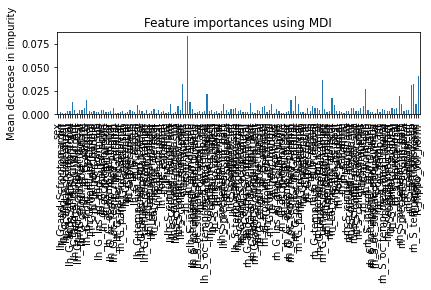

In [ ]:
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Text(0, 0.5, 'Predicted Age')

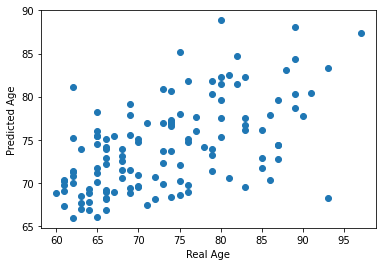

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict

plt.scatter(y_test,p)
plt.xlabel('Real Age')
plt.ylabel('Predicted Age')

In [ ]:

#plot_regression_results(ax,y_test,p,"age predictor", )

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# Procurar os melhores hiperparâmetros
# Criando o modelo base para ajustar
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfg = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rfg.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rfg.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [ ]:
rfr = RandomForestRegressor(bootstrap= True,max_depth=100,max_features= 'auto',
                            min_samples_leaf= 1,min_samples_split= 2,n_estimators=800)

In [ ]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, n_estimators=800)

In [ ]:
p_rf = rfr.predict(X_test)

In [ ]:
m.r2_score(y_test, p_rf)

0.32124940473779406

In [ ]:
m.mean_absolute_error(y_test, p_rf)

5.970843253968254

In [ ]:
m.mean_squared_error(y_test, p_rf)

54.09248059275793

In [ ]:
## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor(random_state=0)

In [ ]:
ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [ ]:
p_ada = ada.predict(X_test)

In [ ]:
m.r2_score(y_test, p_ada)

0.24327368772658076

In [ ]:
m.mean_absolute_error(y_test, p_ada)

6.283216681127984

In [ ]:
m.mean_squared_error(y_test, p_ada)

60.30669239393658

In [ ]:
#Adaboost random CV search 


from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst =AdaBoostRegressor()
ada_g = RandomizedSearchCV(pre_gs_inst , param_distributions = param_dist, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1);
ada_g.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]},
                   random_state=42, verbose=2)

In [ ]:
ada_g.best_params_

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 100}

In [ ]:
best_gs_inst =AdaBoostRegressor(learning_rate= 1, loss= 'square', n_estimators= 100)
best_gs_inst.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100)

In [ ]:
p_ada_g=best_gs_inst.predict(X_test)


In [ ]:
m.r2_score(y_test, p_ada_g)

0.3026278133019338

In [ ]:
m.mean_absolute_error(y_test, p_ada_g)

5.87322640568855

In [ ]:
m.mean_squared_error(y_test, p_ada_g)

55.57651328515124

In [ ]:
#Ajustar os melhores parâmetros do Adaboost


In [ ]:
#MLP Classsifier

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [ ]:
mlpr = MLPRegressor(random_state=1, max_iter=500)

In [ ]:
mlpr.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=1)

In [ ]:
p_mlp = mlpr.predict(X_test)

In [ ]:
m.r2_score(y_test, p_mlp,force_finite=False)

-1.1120391771793239

In [ ]:
m.mean_absolute_error(y_test, p_mlp)

10.312404587415577

In [ ]:
m.mean_squared_error(y_test, p_mlp)

168.31725673637638

In [ ]:
# MLP CV Search

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [-1.00182466e+000 -6.13398232e+001 -1.95661784e+000 -6.08434344e+001
 -9.41604219e-001 -6.15485664e+001 -1.94879383e+000 -5.94491232e+001
 -3.25999188e-001 -4.65587265e+001 -4.64043658e-001 -4.72951763e+001
 -9.23494125e-001 -6.24289990e+001 -2.30136252e+000 -6.08754439e+001
 -1.03631490e+000 -6.18436819e+001 -1.82802290e+000 -6.06546179e+001
 -1.70914863e-001 -4.63101928e+001 -4.29238014e-001 -4.64230912e+001
              nan -2.59409587e+000 -6.75531682e-001 -2.46342480e+000
             -inf -2.18562382e+000 -1.93727179e+252 -2.12156710e+000
 -3.98737525e+001 -1.66973255e+000 -1.95014145e+001 -1.54656784e+000
              nan -2.55469684e+000             -inf -2.60499914e+000
 -3.94136127e+274 -2.06801556e+000 -2.56692033e+001 -2.00583538e+000
 -2.76609621e+001 -1.55984400e+000 -2.66217944e+001 -1.43457375e+000]
  category=UserWarning,
/usr/loc

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
clf.best_params_


{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'solver': 'sgd'}

In [ ]:
#avaliando MLP com melhores parmetros
mlp_g_best=MLPRegressor(activation= 'tanh',alpha= 0.05, hidden_layer_sizes= (100,),learning_rate= 'constant', solver= 'sgd')


In [ ]:
mlp_g_best.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=0.05, solver='sgd')

In [ ]:
p_mlp = mlp_g_best.predict(X_test)


In [ ]:
m.r2_score(y_test, p_mlp, force_finite=False))


-0.0049620314238219

In [ ]:
m.mean_absolute_error(y_test, p_mlp)


7.538209107036237

In [ ]:
m.mean_absolute_error(y_test, p_mlp)


7.538209107036237

In [ ]:
m.mean_squared_error(y_test, p_mlp)

80.08963757925204